In [1]:
## Importing necessary libraries for deep learning, data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd

C:\Users\kratos\anaconda3\envs\tfdml_plugin\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
## Define a function get_data() to load and preprocess the dataset based on the labels and image size

In [ ]:
labels= ['NORMAL' , 'PNEUMONIA' ]
img_size = 200
def get_data(data_dir):
  data = []
  for label in labels:
    path = os.path.join(data_dir , label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (img_size, img_size))
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data)

In [ ]:
## Load and preprocess the training, testing, and validation data using the get_data() function

In [ ]:
train = get_data('/content/drive/MyDrive/Data set/chest_xray/train')
test = get_data('/content/drive/MyDrive/Data set/chest_xray/test')
val = get_data('/content/drive/MyDrive/Data set/chest_xray/val')

In [ ]:
## Extract features and labels from the loaded training, testing, and validation data

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)


for feature, label in test:
    x_test.append(feature)
    y_test.append(label)


for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


## Separate positive (Pneumonia) and negative (Normal) cases from the training data for visualization purposes

In [ ]:
positives=[]
negatives=[]
for i in range(len(y_train)):
    if y_train[i]:
        positives.append(x_train[i])
    else:
        negatives.append(x_train[i])

In [ ]:
## Plot a bar chart to visualize the count of normal and pneumonia cases in the training dataset

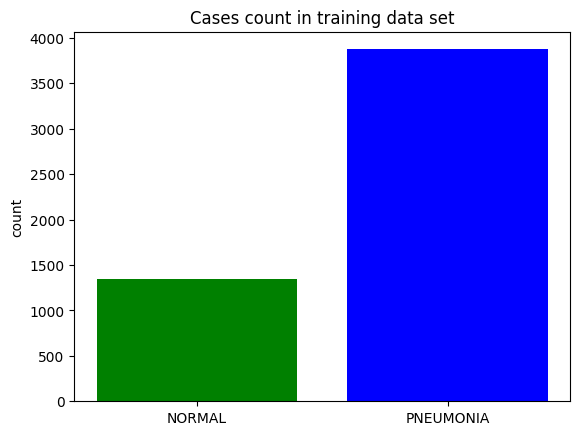

In [ ]:
plt.bar(labels, [len(negatives), len(positives)], color=["green", "blue"])
plt.title("Cases count in training data set")
plt.ylabel("count")
plt.show()

In [ ]:
## Display example images from both classes for visual inspection

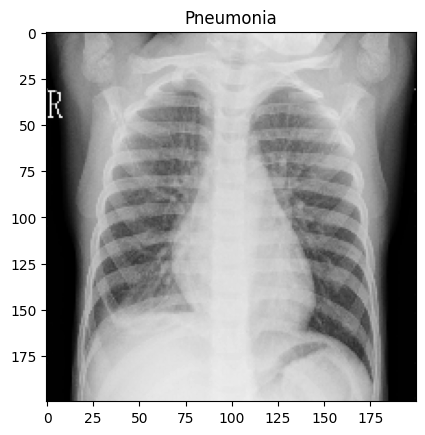

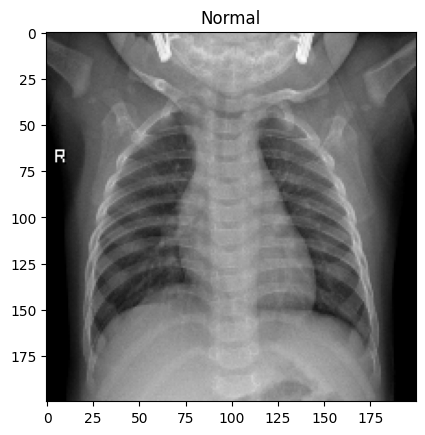

In [ ]:
plt.imshow(positives[4], cmap="gray")
plt.title("Pneumonia")
plt.show()

plt.imshow(negatives[0], cmap="gray")
plt.title("Normal")
plt.show()


In [ ]:
## Normalize pixel values of the images to be between 0 and 1 . We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].

In [ ]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

In [ ]:
## Reshape and prepare the data for feeding into the model

In [ ]:
x_train  = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test  = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

x_val  = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [ ]:
## Define an image data generator with various augmentation options and apply it to the training data

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(x_train)

In [ ]:
## Training the model
## Define the CNN model architecture using Keras' Sequential API

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu' , input_shape = (200,200,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu' ))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model.add(Conv2D(128, (3,3), strides = 1, padding = 'same', activation = 'relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model.add(Conv2D(256, (3,3), strides = 1, padding = 'same', activation = 'relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 64)     2

In [ ]:
learning_rate_reduction =ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [ ]:
## Train the model using the augmented data and the defined callback

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 32),
                   epochs = 15,
                   validation_data = datagen.flow(x_val, y_val),
                   callbacks = learning_rate_reduction)

Epoch 1/15
163/163 [==============================] - 37s 134ms/step - loss: 0.9446 - accuracy: 0.8309 - val_loss: 34.9034 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 22s 133ms/step - loss: 0.2905 - accuracy: 0.8901 - val_loss: 22.9170 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.9080
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 23s 140ms/step - loss: 0.2583 - accuracy: 0.9080 - val_loss: 40.2111 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 23s 139ms/step - loss: 0.1522 - accuracy: 0.9429 - val_loss: 15.1368 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/15
163/163 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9521
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [==================

In [ ]:
## Evaluate the model's performance on the test dataset

In [ ]:
print("Loss of the model is - ", model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test,y_test)[1]*100,"%")

20/20 [==============================] - 0s 15ms/step - loss: 0.2662 - accuracy: 0.9038
Loss of the model is -  0.2661930024623871
20/20 [==============================] - 0s 14ms/step - loss: 0.2662 - accuracy: 0.9038
Accuracy of the model is -  90.38461446762085 %


In [ ]:
## Plot graphs showing training and validation accuracy, as well as training and validation loss over epochs

Text(0, 0.5, 'Loss')

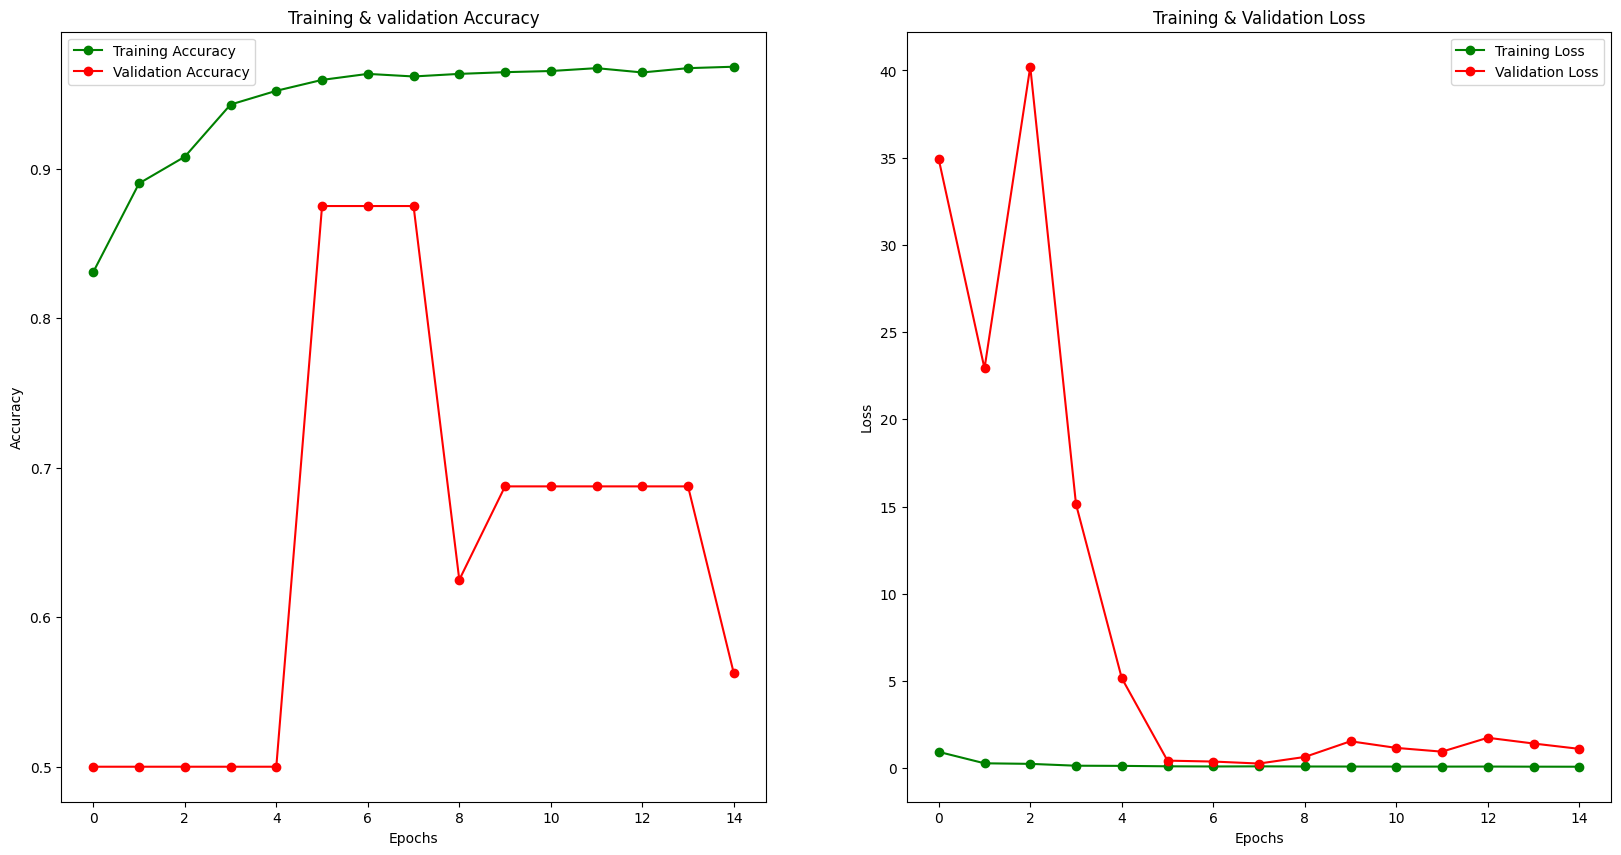

In [ ]:
epochs=list(range(15))
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = "Training Accuracy")
ax[0].plot(epochs , val_acc , 'ro-' , label = "Validation Accuracy")
ax[0].set_title('Training & validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = "Training Loss")
ax[1].plot(epochs , val_loss , 'r-o' , label = "Validation Loss")
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")



In [ ]:
## Convert model predictions to binary (0 or 1) based on the threshold of 0.5

In [ ]:
predictions = model.predict(x_test)
for i in range(len(predictions)):
  predictions[i] = 1 if predictions[i]>0.5 else 0

20/20 [==============================] - 0s 12ms/step


In [ ]:
## Print a classification report and create a confusion matrix to evaluate the model's performance

In [ ]:
print(classification_report(y_test,
                            predictions,
                            target_names = ['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.87      0.87      0.87       234
   Pneumonia       0.92      0.92      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm , index = ['0','1'])
cm

,0,1
0,204,30
1,30,360


In [ ]:
model.save('Pneumonia_model.h5')
print("save sucessfully")

save sucessfully


<Axes: >

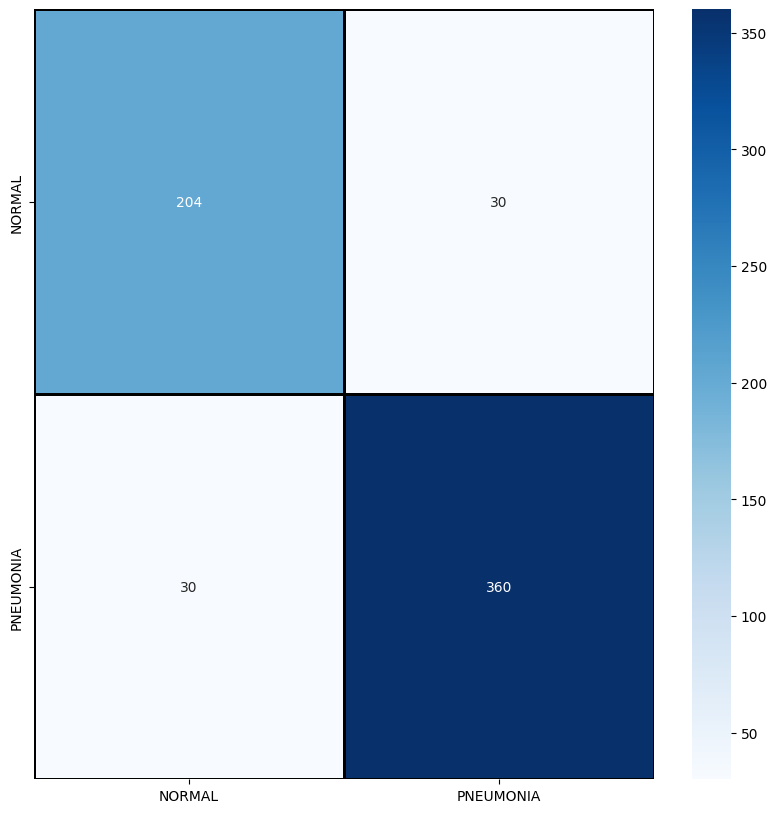

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

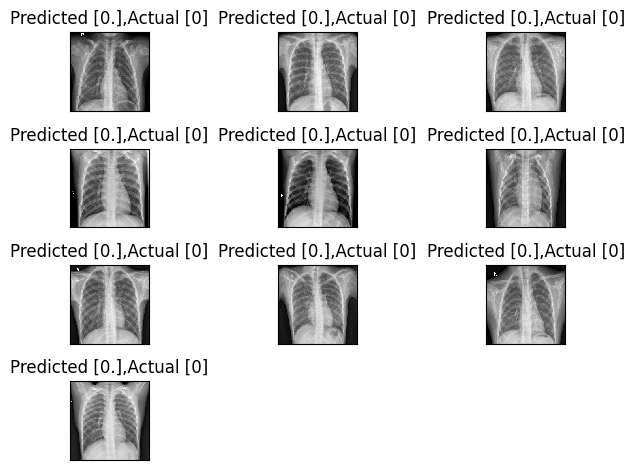

In [ ]:
i = 0
for c in correct[:10]:
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(200,200), cmap="gray", interpolation='none')
    plt.title("Predicted {},Actual {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

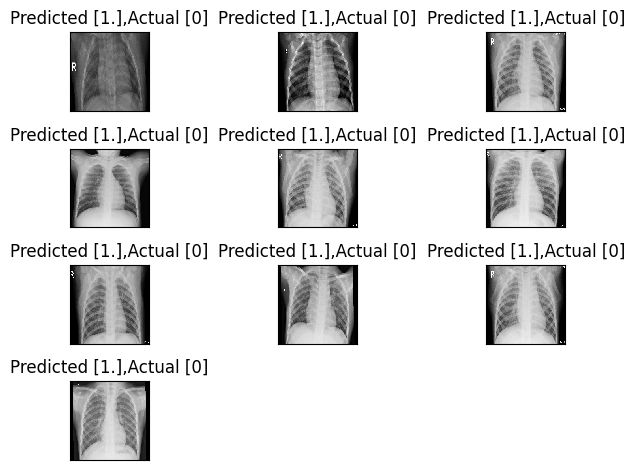

In [ ]:
i = 0
for c in incorrect[:10]:
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(200,200), cmap="gray", interpolation='none')
    plt.title("Predicted {},Actual {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
## Install the Gradio library for creating the interface

In [ ]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.6 MB/s eta 0:

In [ ]:
## Define a function for making pneumonia predictions based on the uploaded image

In [ ]:
def PneumoniaPrediction(img):
  img = np.array(img)/255
  img = img.reshape(-1, 200, 200, 1)
  isPneumonic = model.predict(img)[0]
  imgClass = "Normal" if isPneumonic>0.5 else "Pneumonic"
  print(isPneumonic)
  return imgClass

In [ ]:
pr = model.predict(x_test)
for i in range(len(pr)):
  if pr[i]>0.5:
    pr[i]=1
  else:
    pr[i]=0


20/20 [==============================] - 0s 16ms/step


In [ ]:
import gradio

In [ ]:
## Define the Gradio interface for real-time predictions

In [ ]:
img = gradio.inputs.Image(shape=(200,200))
label = gradio.outputs.Label(num_top_classes=1)

<ipython-input-38-1ab1498917ff>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  img = gradio.inputs.Image(shape=(200,200))
<ipython-input-38-1ab1498917ff>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  img = gradio.inputs.Image(shape=(200,200))
<ipython-input-38-1ab1498917ff>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gradio.outputs.Label(num_top_classes=1)
<ipython-input-38-1ab1498917ff>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gradio.outputs.Label(num_top_classes=1)


In [ ]:
interface = gradio.Interface(fn = PneumoniaPrediction,
                             title = "Pneumonia Detection using Chest X-Ray",
                             inputs = img,
                             outputs = label,
                             interpretation = "default"
                             )
interface.launch(debug=True , share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7e21705bdccb89196b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 21ms/step
[0.68677574]
1/1 [==============================] - 0s 29ms/step
[0.85429084]
1/1 [==============================] - 0s 21ms/step
[0.52512634]
1/1 [==============================] - 0s 19ms/step
[0.08355446]
1/1 [==============================] - 0s 19ms/step
[0.00609973]
1/1 [==============================] - 0s 42ms/step
[0.9011577]
1/1 [==============================] - 0s 20ms/step
[0.647528]
1/1 [==============================] - 0s 23ms/step
[0.00862706]
